In [1]:
using Plots
using LinearAlgebra # For I

# Gradient Descent

In [227]:
function chisquare(O, E)
    return sum(((O .- E).^2) ./ E)
end

chisquare (generic function with 1 method)

In [242]:
function perturbparameters(parameters, perturbation)
    return parameters .* (ones(length(p), length(p)) + perturbation * I)
end

function jacobian(f, x::Vector{Float64}, parameters, perturbation=0.0001)::Array{Float64, 2}
    return cat(
        map(row -> (f(x, row...) - f(x, parameters...)) / perturbation,
            eachrow(perturbparameters(parameters, perturbation)))...,
        dims=2)
end

function gradient(f, x, y, ŷ, parameters, J)
    return transpose(J)*(y-ŷ)
end

function gaussnewton(f, x, y, ŷ, parameters, J)
    return inv(transpose(J)*J)*transpose(J)*(y-ŷ)
end

# Todo: Use Broyden rank-1 update for updating jacobian in certain conditions
# http://people.duke.edu/~hpgavin/ce281/lm.pdf
# https://www.eecs189.org/static/notes/n12.pdf

function step(f, x::Vector{Float64}, y::Vector{Float64}, parameters, α=0.0001)
    W = I
    p = copy(parameters)
    iterations = 1
    while true
        ŷ = f(x, p...)
        J = jacobian(f, x, parameters)
        grad = gaussnewton(f, x, y, ŷ, p, J)
        p = p + grad
        sumsquares = sum((y-ŷ).^2)
        println("Experiment new parameters $(p) loss: $(sumsquares)")
        iterations = iterations + 1
        iterations > 50 && break
        sumsquares > 1 || break
    end
    return p
end

step (generic function with 2 methods)

In [240]:
α = 0.01
f(x, a, b, c, d, e) = a.+b.*exp.(-c.*x) .* sin.(d.*x.+e)
x = collect(0:0.1:3)
y = f(x, 5, 6, 7, 8, 9)
p = [1, 1, 1, 1, 1]

5-element Array{Int64,1}:
 1
 1
 1
 1
 1

Experiment new parameters [2.1574022646418856, 1.2585235856686143, 0.8677854914057875, 0.8199910609341233, 0.9441825254111572] loss: 444.6852156779073
Experiment new parameters [-1917.5313567933229, -7959.3779597306775, -10591.329603381462, -10927.00198686704, -10067.438084489662] loss: 199.5529498610013
Experiment new parameters [NaN, NaN, NaN, NaN, NaN] loss: Inf
Experiment new parameters [NaN, NaN, NaN, NaN, NaN] loss: NaN


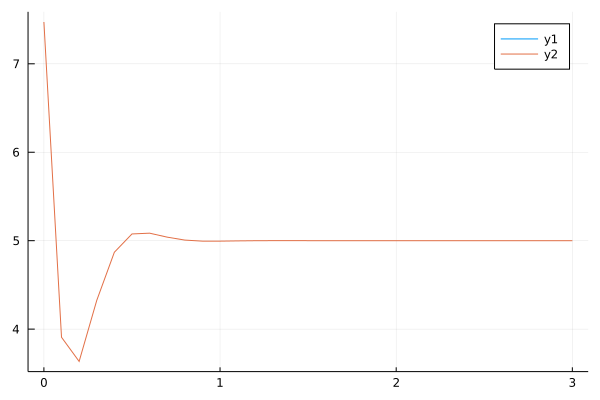

In [241]:
newparameters = gradientdescent(f, collect(x), y, p, α)
ŷ = f(x, newparameters...)
plot([x, x], [ŷ, y])

In [230]:
chisquare(y, ŷ)

31.39721932215896

In [182]:
print(newparameters)

[4.951927363403979, NaN]